In [1]:
import pandas as pd

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [5]:
dataset_path = r"C:\Users\ADMIN\OneDrive - VOZIQ\Desktop\Git Perosnal\practice\Jenkins\DataSet\customer_churn_business_dataset.csv"
data = pd.read_csv(dataset_path)

In [6]:
data.head()

,customer_id,gender,age,country,city,customer_segment,tenure_months,signup_channel,contract_type,monthly_logins,...,avg_resolution_time,complaint_type,csat_score,escalations,email_open_rate,marketing_click_rate,nps_score,survey_response,referral_count,churn
0,CUST_00001,Male,68,Bangladesh,London,SME,22,Web,Monthly,26,...,13.354360,Service,4.0,0,0.71,0.40,27,Satisfied,1,0
1,CUST_00002,Female,57,Canada,Sydney,Individual,9,Mobile,Monthly,7,...,25.140088,Billing,2.0,0,0.78,0.33,-19,Neutral,2,1
2,CUST_00003,Male,24,Germany,New York,SME,58,Web,Yearly,19,...,27.572928,Service,3.0,0,0.35,0.49,80,Neutral,1,0
3,CUST_00004,Male,49,Australia,Dhaka,Individual,19,Mobile,Yearly,34,...,26.420822,Technical,5.0,1,0.83,0.15,100,Neutral,0,0
4,CUST_00005,Male,65,Bangladesh,Delhi,Individual,52,Web,Monthly,20,...,26.674579,Technical,4.0,0,0.65,0.44,21,Unsatisfied,1,0


In [7]:
data.columns

Index(['customer_id', 'gender', 'age', 'country', 'city', 'customer_segment',
       'tenure_months', 'signup_channel', 'contract_type', 'monthly_logins',
       'weekly_active_days', 'avg_session_time', 'features_used',
       'usage_growth_rate', 'last_login_days_ago', 'monthly_fee',
       'total_revenue', 'payment_method', 'payment_failures',
       'discount_applied', 'price_increase_last_3m', 'support_tickets',
       'avg_resolution_time', 'complaint_type', 'csat_score', 'escalations',
       'email_open_rate', 'marketing_click_rate', 'nps_score',
       'survey_response', 'referral_count', 'churn'],
      dtype='object')

In [8]:
data.shape

(10000, 32)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             10000 non-null  object 
 1   gender                  10000 non-null  object 
 2   age                     10000 non-null  int64  
 3   country                 10000 non-null  object 
 4   city                    10000 non-null  object 
 5   customer_segment        10000 non-null  object 
 6   tenure_months           10000 non-null  int64  
 7   signup_channel          10000 non-null  object 
 8   contract_type           10000 non-null  object 
 9   monthly_logins          10000 non-null  int64  
 10  weekly_active_days      10000 non-null  int64  
 11  avg_session_time        10000 non-null  float64
 12  features_used           10000 non-null  int64  
 13  usage_growth_rate       10000 non-null  float64
 14  last_login_days_ago     10000 non-null 

In [11]:
data.isnull().sum()

customer_id                  0
gender                       0
age                          0
country                      0
city                         0
customer_segment             0
tenure_months                0
signup_channel               0
contract_type                0
monthly_logins               0
weekly_active_days           0
avg_session_time             0
features_used                0
usage_growth_rate            0
last_login_days_ago          0
monthly_fee                  0
total_revenue                0
payment_method               0
payment_failures             0
discount_applied             0
price_increase_last_3m       0
support_tickets              0
avg_resolution_time          0
complaint_type            2045
csat_score                   0
escalations                  0
email_open_rate              0
marketing_click_rate         0
nps_score                    0
survey_response              0
referral_count               0
churn                        0
dtype: i

In [17]:
data['churn'].value_counts(normalize=True)*100

churn
0    89.79
1    10.21
Name: proportion, dtype: float64

In [18]:
pip install matplotlib

   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.3 MB 1.7 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/8.3 MB 1.6 MB/s eta 0:00:05
   ----- ---------------------------------- 1.0/8.3 MB 1.6 MB/s eta 0:00:05
   ------- -------------------------------- 1.6/8.3 MB 1.8 MB/s eta 0:00:04
   ---------- ----------------------------- 2.1/8.3 MB 1.9 MB/s eta 0:00:04
   ------------ --------------------------- 2.6/8.3 MB 2.0 MB/s eta 0:00:03
   --------------- ------------------------ 3.1/8.3 MB 2.1 MB/s eta 0:00:03
   ---------------- ----------------------- 3.4/8.3 MB 2.1 MB/s eta 0:00:03
   -------------------- ------------------- 4.2/8.3 MB 2.1 MB/s eta 0:00:02
   --------------------- ------------------ 4.5/8.3 MB 2.2 MB/s eta 0:00:02
   ------------------------- -------------- 5.2/8.3 MB 2.2 MB/s eta 0:00:02
   -----------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [19]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


<Axes: xlabel='tenure_months', ylabel='churn'>

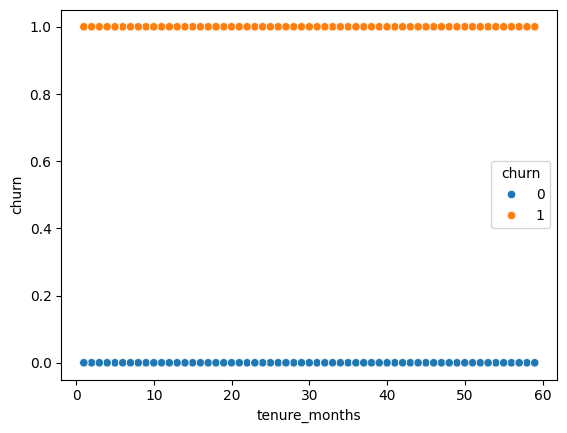

In [24]:
sns.scatterplot(x = 'tenure_months', y='churn', hue='churn', data=data)

<Axes: xlabel='customer_id', ylabel='age'>

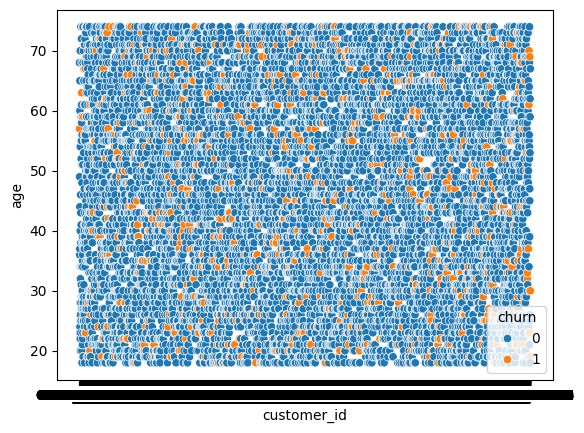

In [26]:
sns.scatterplot(x='customer_id', y='age', hue='churn', data=data)